In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = {
    'Trip Start Timestamp': ['2023-01-01 08:00:00', '2023-01-01 09:30:00', '2023-01-01 10:15:00',
                             '2023-01-02 11:45:00', '2023-01-02 13:00:00', '2023-01-03 07:30:00',
                             '2023-01-03 08:45:00', '2023-01-04 09:15:00', '2023-01-04 10:00:00', '2023-01-04 11:30:00'],
    'Trip End Timestamp': ['2023-01-01 08:30:00', '2023-01-01 09:45:00', '2023-01-01 10:30:00',
                           '2023-01-02 12:15:00', '2023-01-02 13:20:00', '2023-01-03 08:00:00',
                           '2023-01-03 09:00:00', '2023-01-04 09:45:00', '2023-01-04 10:30:00', '2023-01-04 12:00:00'],
    'Trip Seconds': [1800, 900, 900, 1800, 1200, 1800, 900, 1800, 1800, 1800],
    'Trip Miles': [5.2, 3.0, 2.8, 6.5, 4.0, 5.0, 3.5, 5.8, 6.1, 5.4],
    'Fare': [12.5, 8.0, 7.5, 15.0, 10.0, 13.0, 9.0, 14.0, 14.5, 13.5]
}

df = pd.DataFrame(data)

# Convert time columns to datetime
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'])
df['Trip End Timestamp'] = pd.to_datetime(df['Trip End Timestamp'])

df.head()


,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Fare
0,2023-01-01 08:00:00,2023-01-01 08:30:00,1800,5.2,12.5
1,2023-01-01 09:30:00,2023-01-01 09:45:00,900,3.0,8.0
2,2023-01-01 10:15:00,2023-01-01 10:30:00,900,2.8,7.5
3,2023-01-02 11:45:00,2023-01-02 12:15:00,1800,6.5,15.0
4,2023-01-02 13:00:00,2023-01-02 13:20:00,1200,4.0,10.0


In [3]:
# Feature engineering
df['Hour'] = df['Trip Start Timestamp'].dt.hour
df['Weekday'] = df['Trip Start Timestamp'].dt.weekday


In [4]:
# Select features and target
X = df[['Trip Seconds', 'Trip Miles', 'Hour', 'Weekday']]
y = df['Fare']


In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Predict on test set
y_pred = model.predict(X_test)


In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.06111074722492843
Root Mean Squared Error (RMSE): 0.24720588023938353
R-squared (R²): 0.994214367126634


In [9]:
predictions_df = pd.DataFrame({
    'Actual Fare': y_test.values,
    'Predicted Fare': y_pred
})
predictions_df.head(10)


,Actual Fare,Predicted Fare
0,14.5,14.297375
1,8.0,7.715106


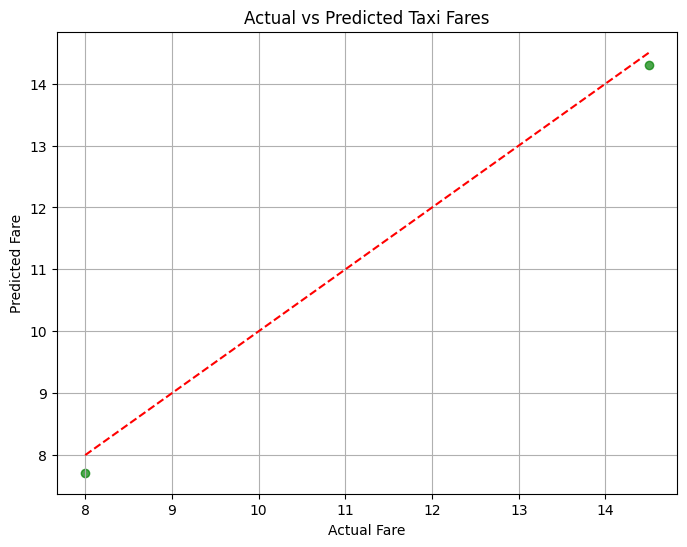

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Taxi Fares")
plt.grid(True)
plt.show()
